# Trabalho Prático Laboratorial #2

In [1]:
# Import Modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
%matplotlib inline

In [3]:

data_path = "../data"
forest_path = os.path.join(data_path, "forest-area", "API_AG.LND.FRST.K2_DS2_en_csv_v2_4019655.csv")
surface_path = os.path.join(data_path, "surface-area", "API_AG.SRF.TOTL.K2_DS2_en_csv_v2_4023648.csv")
header_rows =  [0, 2]

### 1. Qual variação da área florestal de cada país ao longo do tempo?

In [4]:
# Read Datasets
forest_data = pd.read_csv(forest_path, skiprows=header_rows)

# Removes row if all values are NaN
forest_data = forest_data.dropna(axis=0, how='all')

# Removes column if all values are NaN
forest_data = forest_data.dropna(axis=1, how='all')

In [5]:
forest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,4.2,4.200,4.200,4.200,4.200,4.20,...,4.20,4.20,4.20,4.20,4.2,4.200000e+00,4.2,4.20,4.2,4.2
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,4988232.4,4968316.114,4947640.628,4911134.742,4890838.856,4870542.97,...,4765400.98,4734211.36,4703021.74,4671832.12,4640642.5,4.607876e+06,4575901.2,4544314.78,4511676.2,4479395.0
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,12084.4,12084.400,12084.400,12084.400,12084.400,12084.40,...,12084.40,12084.40,12084.40,12084.40,12084.4,1.208440e+04,12084.4,12084.40,12084.4,12084.4
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,2060349.0,2049660.284,2038971.568,2028282.852,2017594.136,2006905.42,...,1862169.28,1854212.96,1846256.64,1838300.32,1830344.0,1.822961e+06,1815608.1,1807898.60,1800220.1,1792580.7
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,792627.8,791073.630,789519.460,787965.290,786411.120,784856.95,...,716029.38,710478.76,704928.14,699377.52,693826.9,6.882762e+05,682725.7,677175.10,671624.4,666073.8


In [6]:
columns = forest_data.columns.values.astype('U')
id_columns = columns[np.invert(np.char.isdigit(columns))]
value_columns = columns[np.char.isdigit(columns)]
data = pd.melt(forest_data, id_vars=id_columns, value_vars=value_columns, var_name='Year', value_name='Ratio')

In [7]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Ratio
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,1990,4.2
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,1990,4988232.4
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,1990,12084.4
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,1990,2060349.0
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,1990,792627.8


### 2. Qual o rácio entre a área florestal e a área total de cada paí


In [8]:
# Read Datasets
forest_data = pd.read_csv(forest_path, skiprows=header_rows)
surface_data = pd.read_csv(surface_path, skiprows=header_rows)

# Removes row if all values are NaN
forest_data = forest_data.dropna(axis=0, how='all')
surface_data = surface_data.dropna(axis=0, how='all')

# Removes column if all values are NaN
forest_data = forest_data.dropna(axis=1, how='all')
surface_data = surface_data.dropna(axis=1, how='all')

In [9]:
# Visualize data structure
forest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,4.2,4.200,4.200,4.200,4.200,4.20,...,4.20,4.20,4.20,4.20,4.2,4.200000e+00,4.2,4.20,4.2,4.2
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,4988232.4,4968316.114,4947640.628,4911134.742,4890838.856,4870542.97,...,4765400.98,4734211.36,4703021.74,4671832.12,4640642.5,4.607876e+06,4575901.2,4544314.78,4511676.2,4479395.0
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,12084.4,12084.400,12084.400,12084.400,12084.400,12084.40,...,12084.40,12084.40,12084.40,12084.40,12084.4,1.208440e+04,12084.4,12084.40,12084.4,12084.4
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,2060349.0,2049660.284,2038971.568,2028282.852,2017594.136,2006905.42,...,1862169.28,1854212.96,1846256.64,1838300.32,1830344.0,1.822961e+06,1815608.1,1807898.60,1800220.1,1792580.7
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,792627.8,791073.630,789519.460,787965.290,786411.120,784856.95,...,716029.38,710478.76,704928.14,699377.52,693826.9,6.882762e+05,682725.7,677175.10,671624.4,666073.8


In [10]:
# Visualize data structure
surface_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Surface area (sq. km),AG.SRF.TOTL.K2,180.0,180.0,180.0,180.0,180.0,180.0,...,1.800000e+02,1.800000e+02,180.00,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,180.00,1.800000e+02
1,Africa Eastern and Southern,AFE,Surface area (sq. km),AG.SRF.TOTL.K2,12718531.0,12718531.0,12718531.0,12718531.0,12718531.0,12718531.0,...,1.263289e+07,1.263290e+07,15121164.46,1.512116e+07,1.512116e+07,1.512116e+07,1.512116e+07,1.512116e+07,15121155.64,1.512116e+07
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,652860.0,652860.0,652860.0,652860.0,652860.0,652860.0,...,6.528600e+05,6.528600e+05,652860.00,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,652860.00,6.528600e+05
3,Africa Western and Central,AFW,Surface area (sq. km),AG.SRF.TOTL.K2,9166270.0,9166270.0,9166270.0,9166270.0,9166270.0,9166270.0,...,9.166270e+06,9.166270e+06,9166270.00,9.166270e+06,9.166270e+06,9.166270e+06,9.166270e+06,9.166270e+06,9166270.00,9.166270e+06
4,Angola,AGO,Surface area (sq. km),AG.SRF.TOTL.K2,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,...,1.246700e+06,1.246700e+06,1246700.00,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1246700.00,1.246700e+06


In [11]:
forest_data.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [12]:
surface_data.columns.values

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'], dtype=object)

In [13]:
drop_columns = ['Indicator Name', 'Indicator Code']
surface = surface_data.drop(columns=[col for col in surface_data if (col not in forest_data.columns.values) or (col in drop_columns)])
forest = forest_data.drop(columns=[col for col in forest_data if (col not in surface_data.columns.values) or (col in drop_columns)])

In [14]:
data = forest.combine(surface, lambda x, y: x / y if x.dtype != object and y.dtype != object else x)

In [15]:
data.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,...,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333,0.023333
1,Africa Eastern and Southern,AFE,0.392202,0.390636,0.389010,0.389744,0.388133,0.386522,0.384912,0.383301,...,0.360067,0.379691,0.315148,0.313085,0.311023,0.308960,0.306897,0.304730,0.302616,0.300527
2,Afghanistan,AFG,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,...,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510,0.018510
3,Africa Western and Central,AFW,0.224775,0.223609,0.222443,0.221277,0.220111,0.218945,0.217779,0.216612,...,0.204932,0.204023,0.203155,0.202287,0.201419,0.200551,0.199683,0.198877,0.198075,0.197234
4,Angola,AGO,0.635781,0.634534,0.633287,0.632041,0.630794,0.629548,0.628301,0.627054,...,0.583244,0.578792,0.574340,0.569888,0.565435,0.560983,0.556531,0.552078,0.547626,0.543174


In [16]:
columns = data.columns.values.astype('U')
id_columns = columns[np.invert(np.char.isdigit(columns))]
value_columns = columns[np.char.isdigit(columns)]
data2 = pd.melt(data, id_vars=id_columns, value_vars=value_columns, var_name='Year', value_name='Ratio')

In [17]:
data2.head()

,Country Name,Country Code,Year,Ratio
0,Aruba,ABW,1990,0.023333
1,Africa Eastern and Southern,AFE,1990,0.392202
2,Afghanistan,AFG,1990,0.018510
3,Africa Western and Central,AFW,1990,0.224775
4,Angola,AGO,1990,0.635781


<AxesSubplot:xlabel='Year', ylabel='Ratio'>

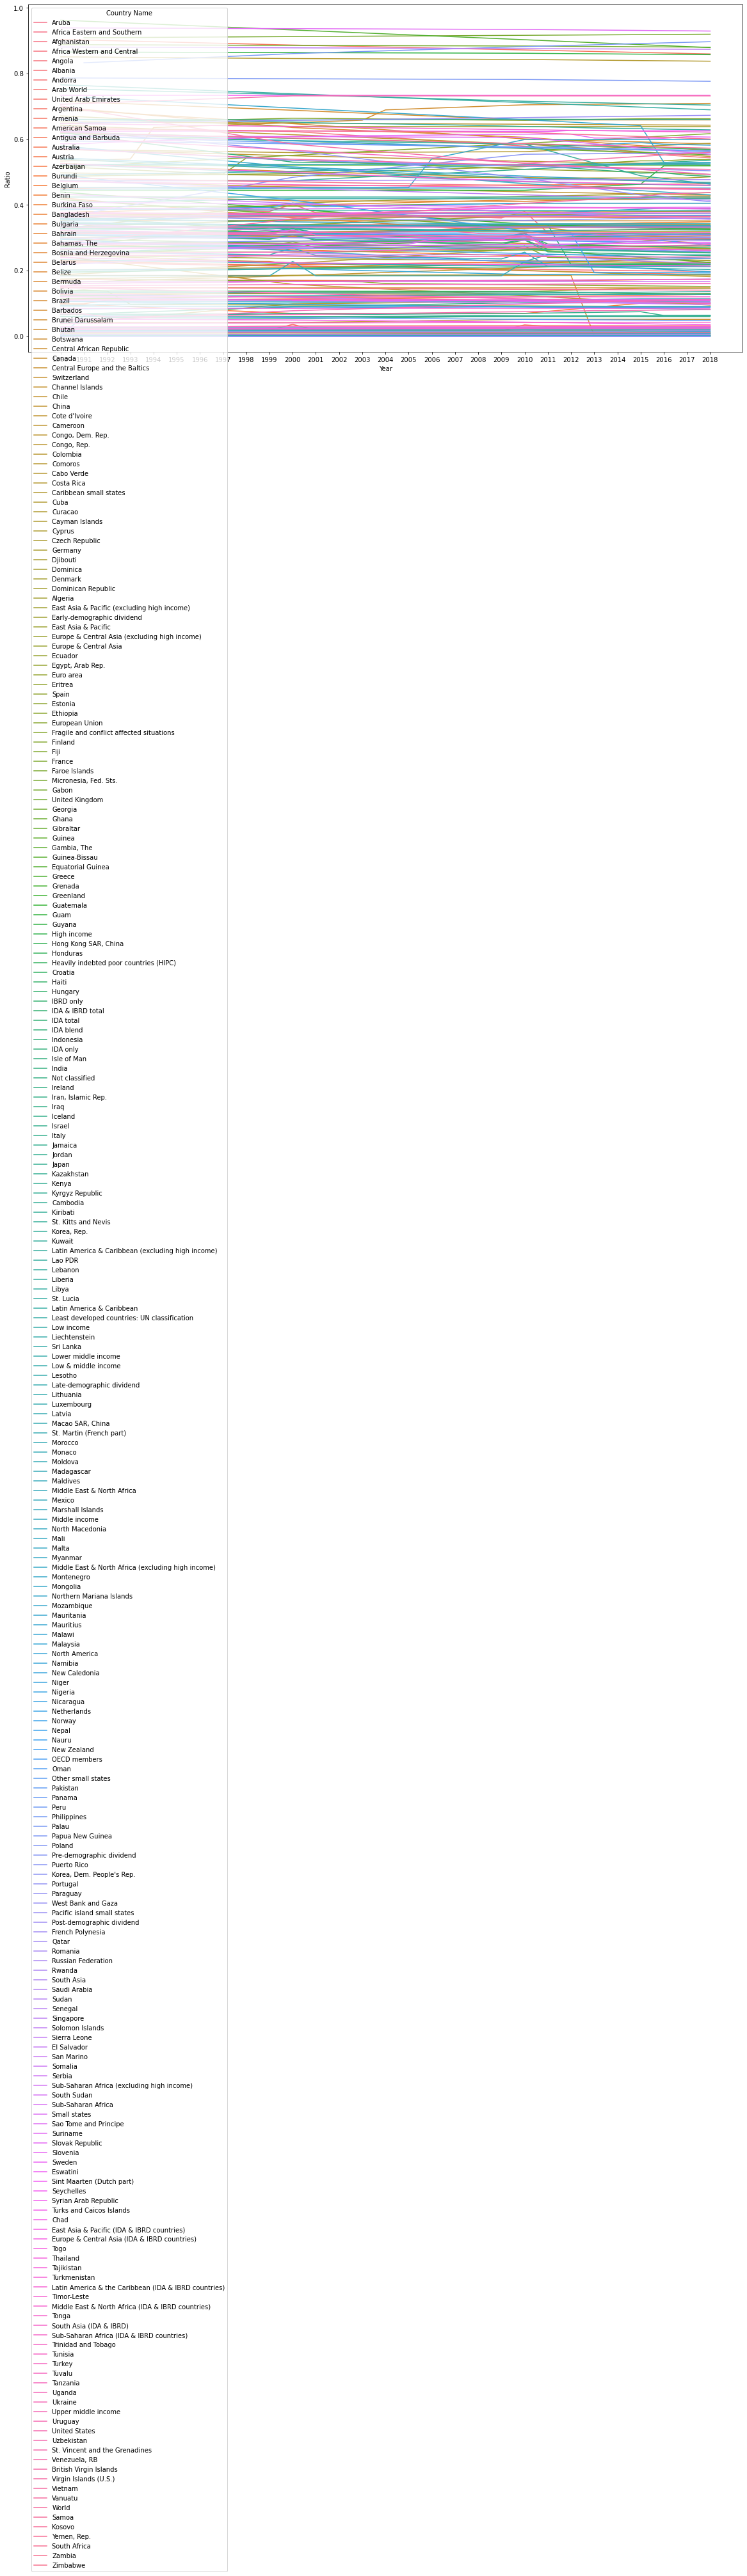

In [18]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.lineplot(data=data2, x="Year", y="Ratio", hue="Country Name")

### 3. Como se comparam os vários países do mundo a nível de incêndios?

### 4. Como se compara perda de floresta ao longo dos anos em cada país com os incêndios que ocorreram em cada um desses anos?

### 5. Como varia a área florestal ao longo dos anos com as atividades económicas (agricultura e mineração) de cada país?

### 6. Como se relacionam os diferentes tipos de floresta com a área florestal ardida?

### 7. Como se relaciona a densidade populacional com a área florestal em cada país ao longo do tempo?

### 8. Como se relaciona o PIB per capita com a desflorestação em cada país ao longo do tempo?

### 9. Como se relaciona a temperatura, precipitação, humidade, vento de cada país com os incêndios ocorridos por ano?

## Fim